# Analysing and plotting magnetic resonance data

This notebook contains a quick example of plotting data stored in magres files, without performing any referencing.

In [1]:
from matador.scrapers import magres2dict
from matador.plotting import plot_magres
magres, failures = magres2dict("*.magres", as_model=True)

Successfully scraped 2 out of 2 files.


In [2]:
for doc in magres:
    print(doc)
    for site in doc:
        print(site)
        break

Li₃P: LiP_CASTEP18
20  atoms. P1
(a, b, c) = 4.1333 Å, 6.0638 Å, 12.5450 Å
(α, β, γ) = 88.4518° 80.5130° 90.0085°

Li 0.0916 0.3584 0.9424
chemical_shielding_iso = 83.7003
magnetic_shielding_tensor = 
  [[ 8.16e+01  6.11e-03 -4.30e-02]
   [ 1.27e-02  7.99e+01  1.36e+00]
   [-5.07e-02  2.13e+00  8.96e+01]]
chemical_shift_aniso = 9.3772
chemical_shift_asymmetry = 0.3284
---
Na₃P: NaP_QE6
4   atoms. Fm-3m
(a, b, c) = 5.0075 Å, 5.0075 Å, 5.0075 Å
(α, β, γ) = 120.0020° 120.0020° 89.9965°

Na 0.0000 0.0000 0.0000
chemical_shielding_iso = 518.1528
magnetic_shielding_tensor = 
  [[518.53  -0.     0.  ]
   [ -0.   518.53   0.  ]
   [ -0.     0.   517.4 ]]
chemical_shift_aniso = -1.1365
chemical_shift_asymmetry = -0.0000
---


## Species as separate figures

No sites of Na found in LiP_CASTEP18, signal will be empty.
No sites of Li found in NaP_QE6, signal will be empty.


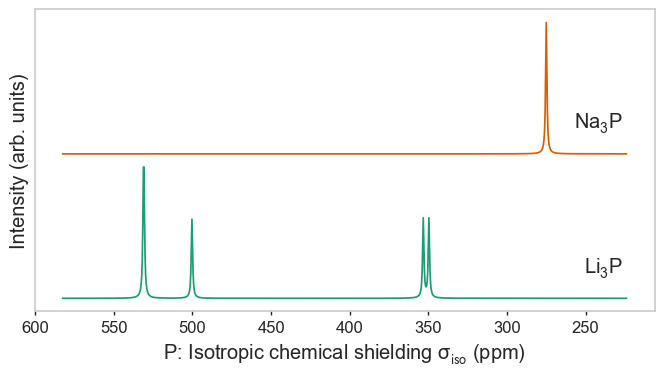

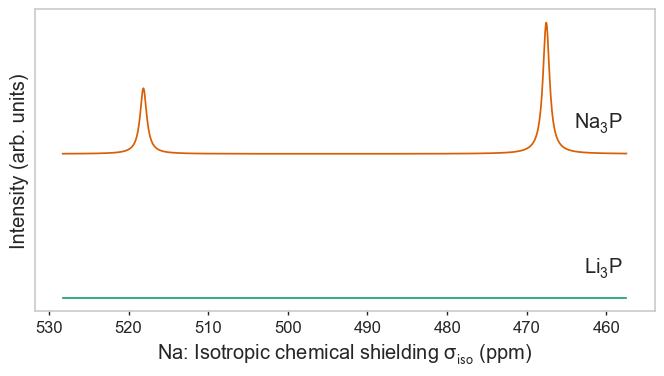

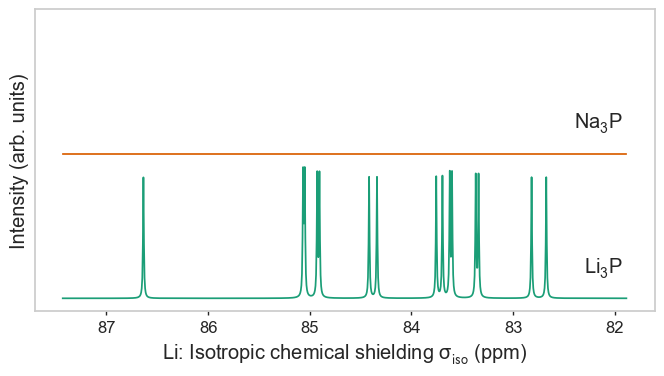

In [3]:
plot_magres(magres, "P")
plot_magres(magres, "Na")
plot_magres(magres, "Li", broadening_width=0.01);

## Species as subplots with custom colours and labels

No sites of Na found in LiP_CASTEP18, signal will be empty.
No sites of Li found in NaP_QE6, signal will be empty.


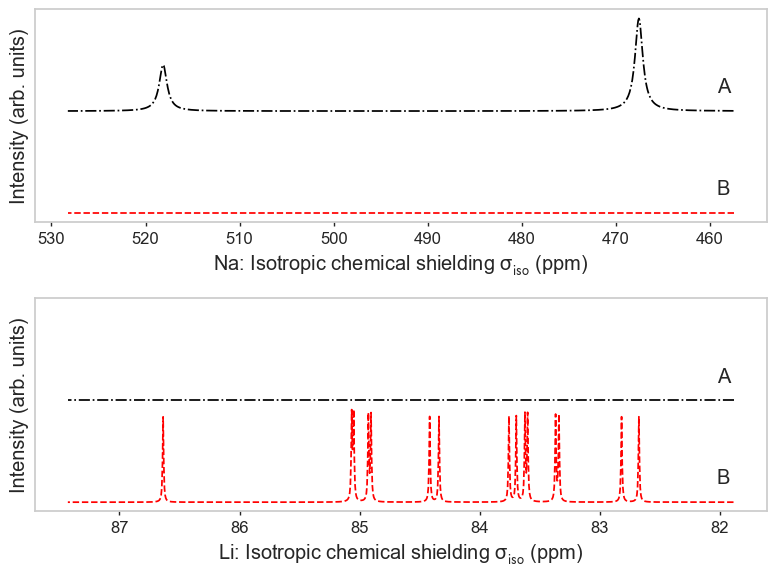

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
line_kwargs = [{"c": "red", "ls": "--"}, {"c": "black", "ls": "-."}]
labels = ["B", "A"]
plot_magres(
    magres, "Na", 
    ax=axes[0], line_kwargs=line_kwargs, signal_labels=labels
)
plot_magres(
    magres, "Li", broadening_width=0.01, 
    ax=axes[1], line_kwargs=line_kwargs, signal_labels=labels
)
plt.tight_layout()

## Other magres quantities as subplots

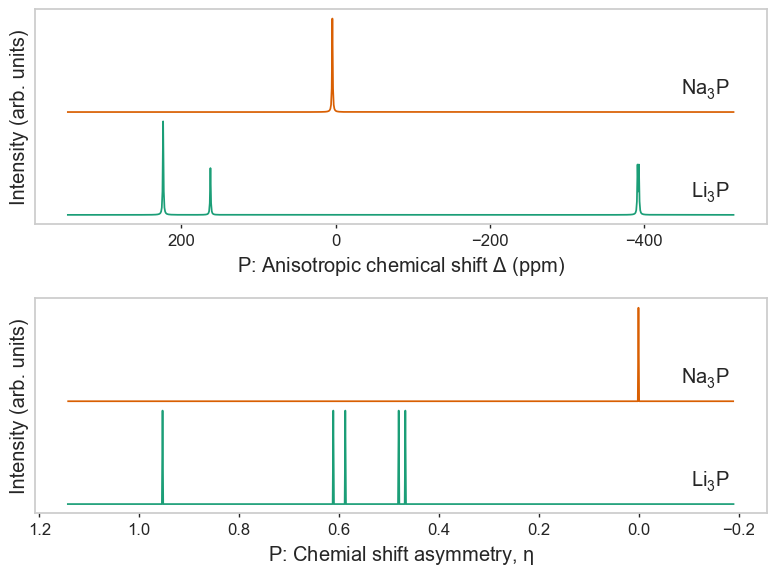

In [5]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
plot_magres(
    magres, "P", magres_key="chemical_shift_aniso",
    ax=axes[0]
)
plot_magres(
    magres, "P", magres_key="chemical_shift_asymmetry",
    ax=axes[1],
    broadening_width=0,
)
plt.tight_layout()